In [1]:
import pandas as pd

In [2]:
data =pd.read_csv(r'C:\Users\ADMIN\Downloads\bank-full.csv')


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO


In [5]:
import graphviz
from statistics import median,mean
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [9]:
data.shape

(45211, 17)

In [10]:
# Data type of each features
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

* 10 features have object type , ? numbers
*  *as per given data we know 10 features are of category type,so let's convert them as num type*

In [11]:
data[['job','marital','education','default','housing','loan','contact','poutcome','Target','month']].apply(pd.Categorical)

,job,marital,education,default,housing,loan,contact,poutcome,Target,month
0,management,married,tertiary,no,yes,no,unknown,unknown,no,may
1,technician,single,secondary,no,yes,no,unknown,unknown,no,may
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,no,may
3,blue-collar,married,unknown,no,yes,no,unknown,unknown,no,may
4,unknown,single,unknown,no,no,no,unknown,unknown,no,may
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,unknown,yes,nov
45207,retired,divorced,primary,no,no,no,cellular,unknown,yes,nov
45208,retired,married,secondary,no,no,no,cellular,success,yes,nov
45209,blue-collar,married,secondary,no,no,no,telephone,unknown,no,nov


In [12]:
data.dtypes.to_frame("Data Types Of Attributes").T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Data Types Of Attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [13]:
# Check the Presence of missing values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [14]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [15]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [16]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [17]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [20]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [21]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [22]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


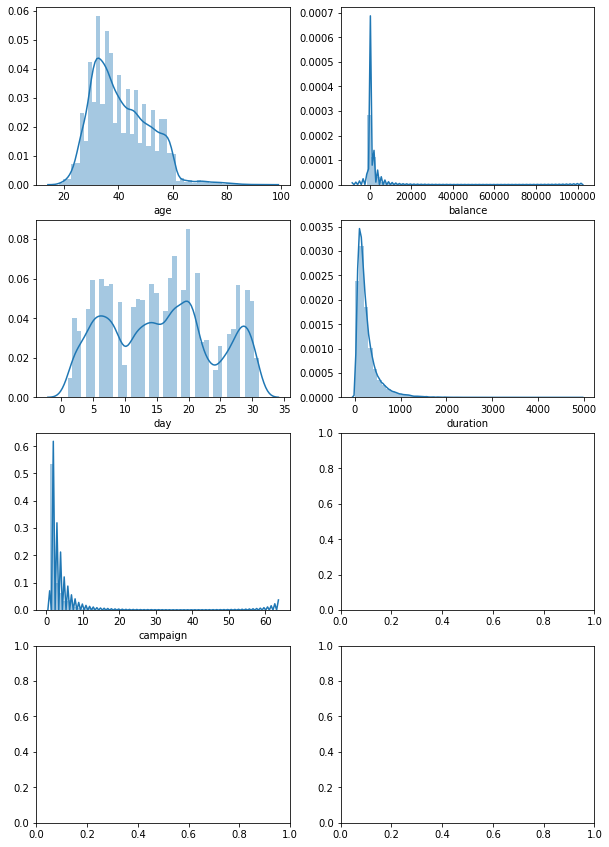

In [24]:
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])

No handles with labels found to put in legend.


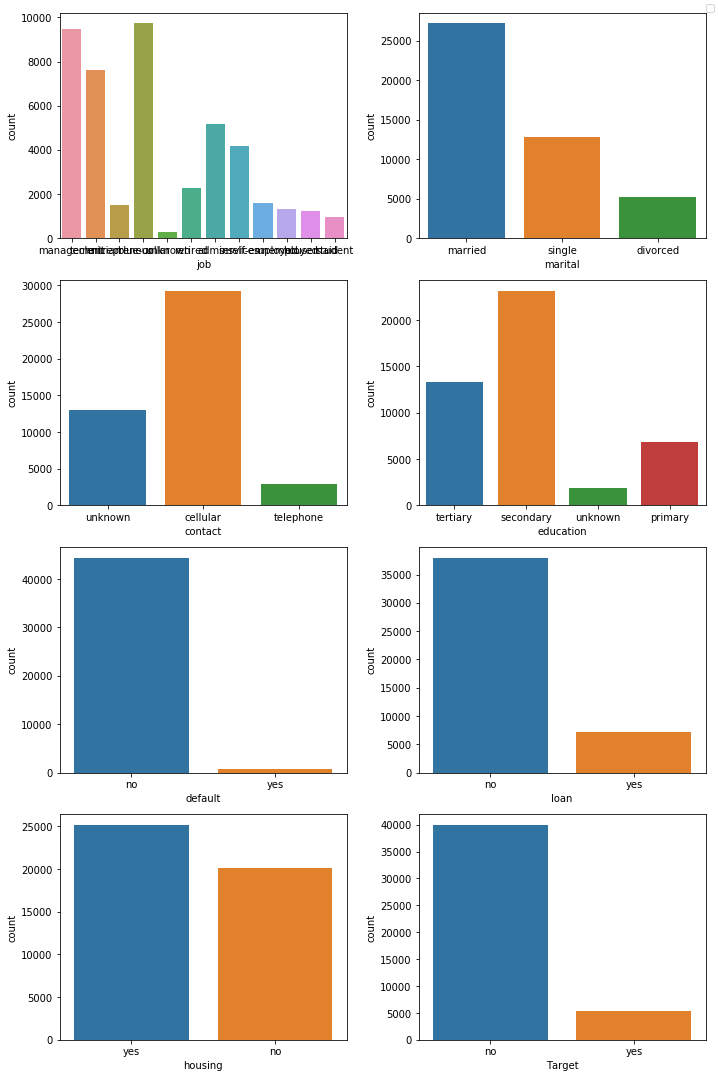

In [25]:
# Distrubution of categorical Features
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
plot = sns.countplot(x=data['job'], data=data,ax=axe[0])
#plt.set(plt.get_xticklabels(),rotation= 90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['contact'],data=data,ax=axe[2])
sns.countplot(x=data['education'],data=data,ax=axe[3])
sns.countplot(x=data['default'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['housing'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[7])
sns.countplot(x=data['Target'],data=data,ax=axe[7])

#sns.countplot(x=data['pdays'],data=data,ax=axe[8])



fig.tight_layout()
fig.legend()


###  Infrence From the data

* More than 90% of the Customer are not default customers

* Only 10% of the customers are default custtomers ffrom the above dataset

* Most cusdtomers are contacted in the month of may

- Most of he accounts created are male

- 90% of the customers have not subscribed for the term deposits

- Most of the customers have been contacted in the month of may

- Most of the customers have been contacted by cellular device

- Number of cusyomers who have Housing Loan is more than number of customers who don't have housing loan.

- Around 6% customers have credit in default



In [26]:
# Measure The Skewness of The Numerical Features
data.skew().to_frame('skewness measure')

,skewness measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


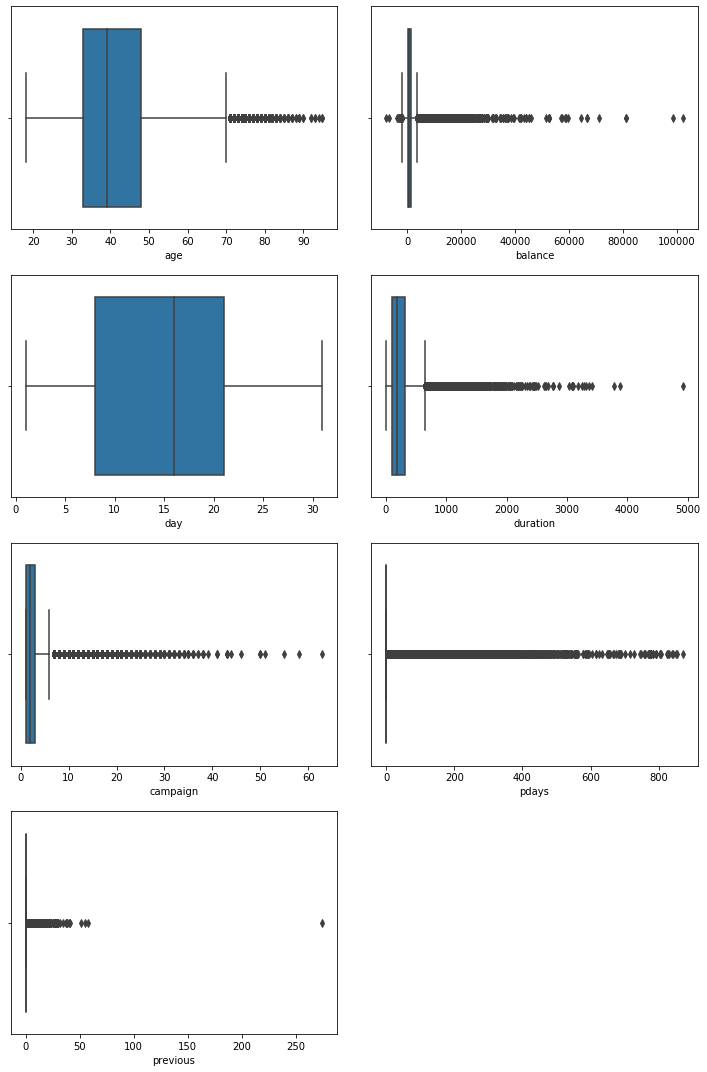

In [27]:
# Checking The Presence Of Outliers
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()

sns.boxplot(x='age', data =data,ax = axe[0])
sns.boxplot(x='balance', data =data,ax = axe[1])
sns.boxplot(x='day', data =data,ax = axe[2])
sns.boxplot(x='duration', data =data,ax = axe[3])
sns.boxplot(x='campaign', data =data,ax = axe[4])
sns.boxplot(x='pdays', data =data,ax = axe[5])
sns.boxplot(x='previous', data =data,ax = axe[6])




fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [28]:
data['Target'].value_counts().to_frame('Targetfeature distrubution')

,Targetfeature distrubution
no,39922
yes,5289


In [29]:
df = data.copy()
encoder=LabelEncoder()
df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)

In [30]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int32 
 3   education  45211 non-null  int32 
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int32 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int32 
 16  Target     45211 non-null  int32 
dtypes: int32(8), int64(7), object(2)
memory usage: 4.5+ MB


In [32]:
df[['job','marital','education','default','housing','loan','contact','poutcome','Target','month']].apply(pd.Categorical)

,job,marital,education,default,housing,loan,contact,poutcome,Target,month
0,management,1,2,0,1,0,unknown,3,0,8
1,technician,2,1,0,1,0,unknown,3,0,8
2,entrepreneur,1,1,0,1,1,unknown,3,0,8
3,blue-collar,1,3,0,1,0,unknown,3,0,8
4,unknown,2,3,0,0,0,unknown,3,0,8
...,...,...,...,...,...,...,...,...,...,...
45206,technician,1,2,0,0,0,cellular,3,1,9
45207,retired,0,0,0,0,0,cellular,3,1,9
45208,retired,1,1,0,0,0,cellular,2,1,9
45209,blue-collar,1,1,0,0,0,telephone,3,0,9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int32 
 3   education  45211 non-null  int32 
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int32 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int32 
 16  Target     45211 non-null  int32 
dtypes: int32(8), int64(7), object(2)
memory usage: 4.5+ MB


In [34]:
# Handling Outliers with mean replacement

meanbal = float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

meandur = float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])

meancamp = float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancamp,df['campaign'])

meanpdays = float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpdays,df['pdays'])

meanprev = float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanprev,df['previous'])


C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


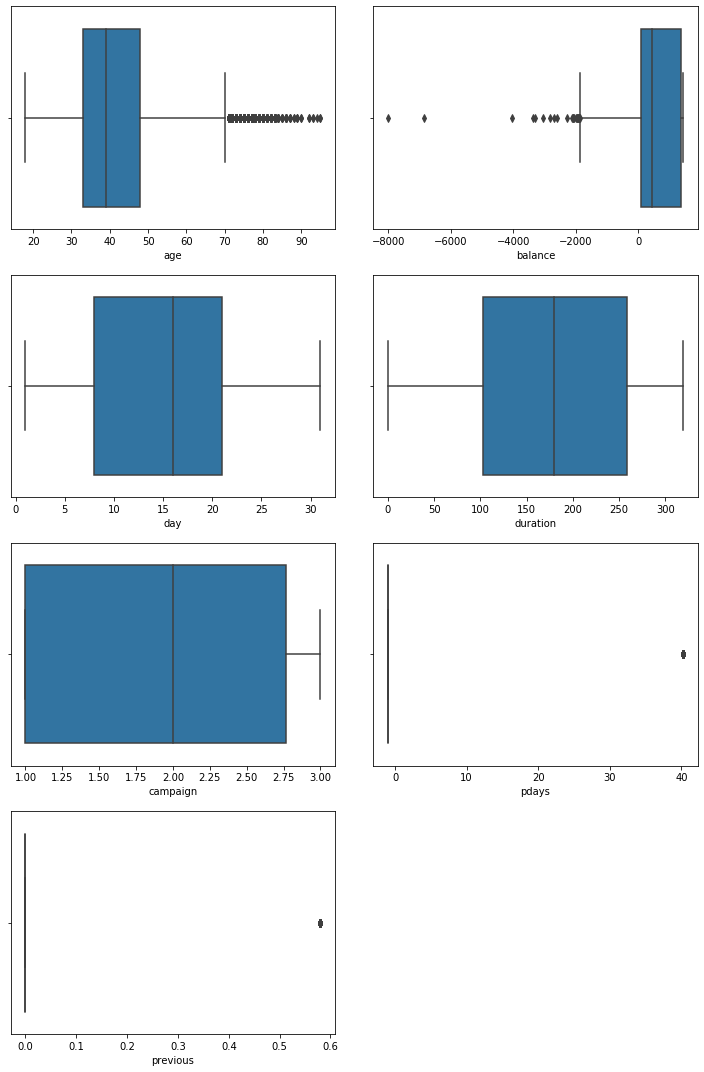

In [35]:
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()

sns.boxplot(x='age', data =df,ax = axe[0])
sns.boxplot(x='balance', data =df,ax = axe[1])
sns.boxplot(x='day', data =df,ax = axe[2])
sns.boxplot(x='duration', data =df,ax = axe[3])
sns.boxplot(x='campaign', data =df,ax = axe[4])
sns.boxplot(x='pdays', data =df,ax = axe[5])
sns.boxplot(x='previous', data =df,ax = axe[6])




fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)


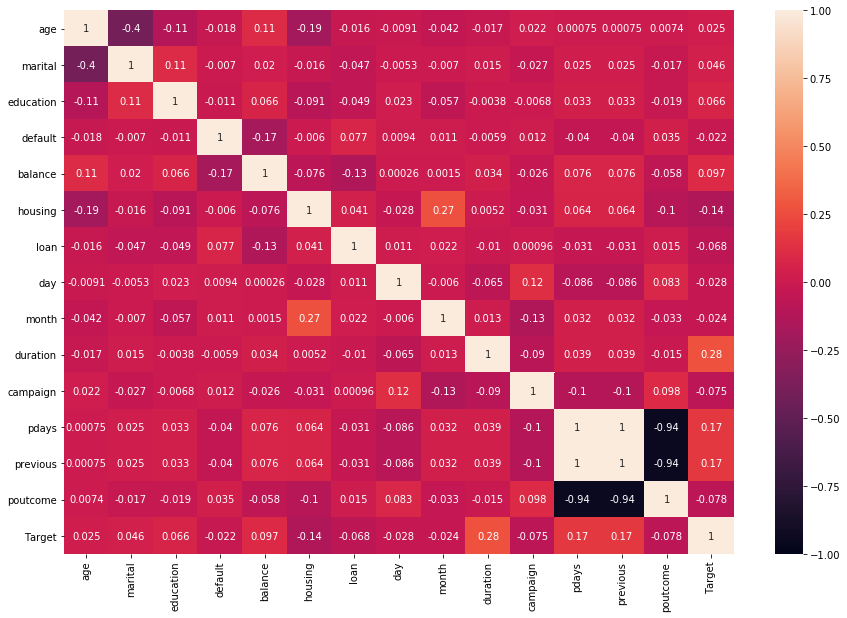

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

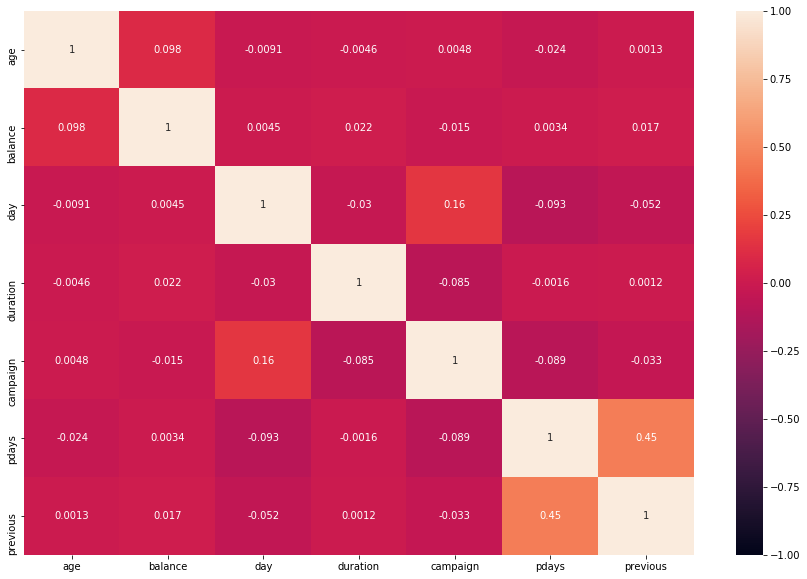

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [38]:
df2=df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


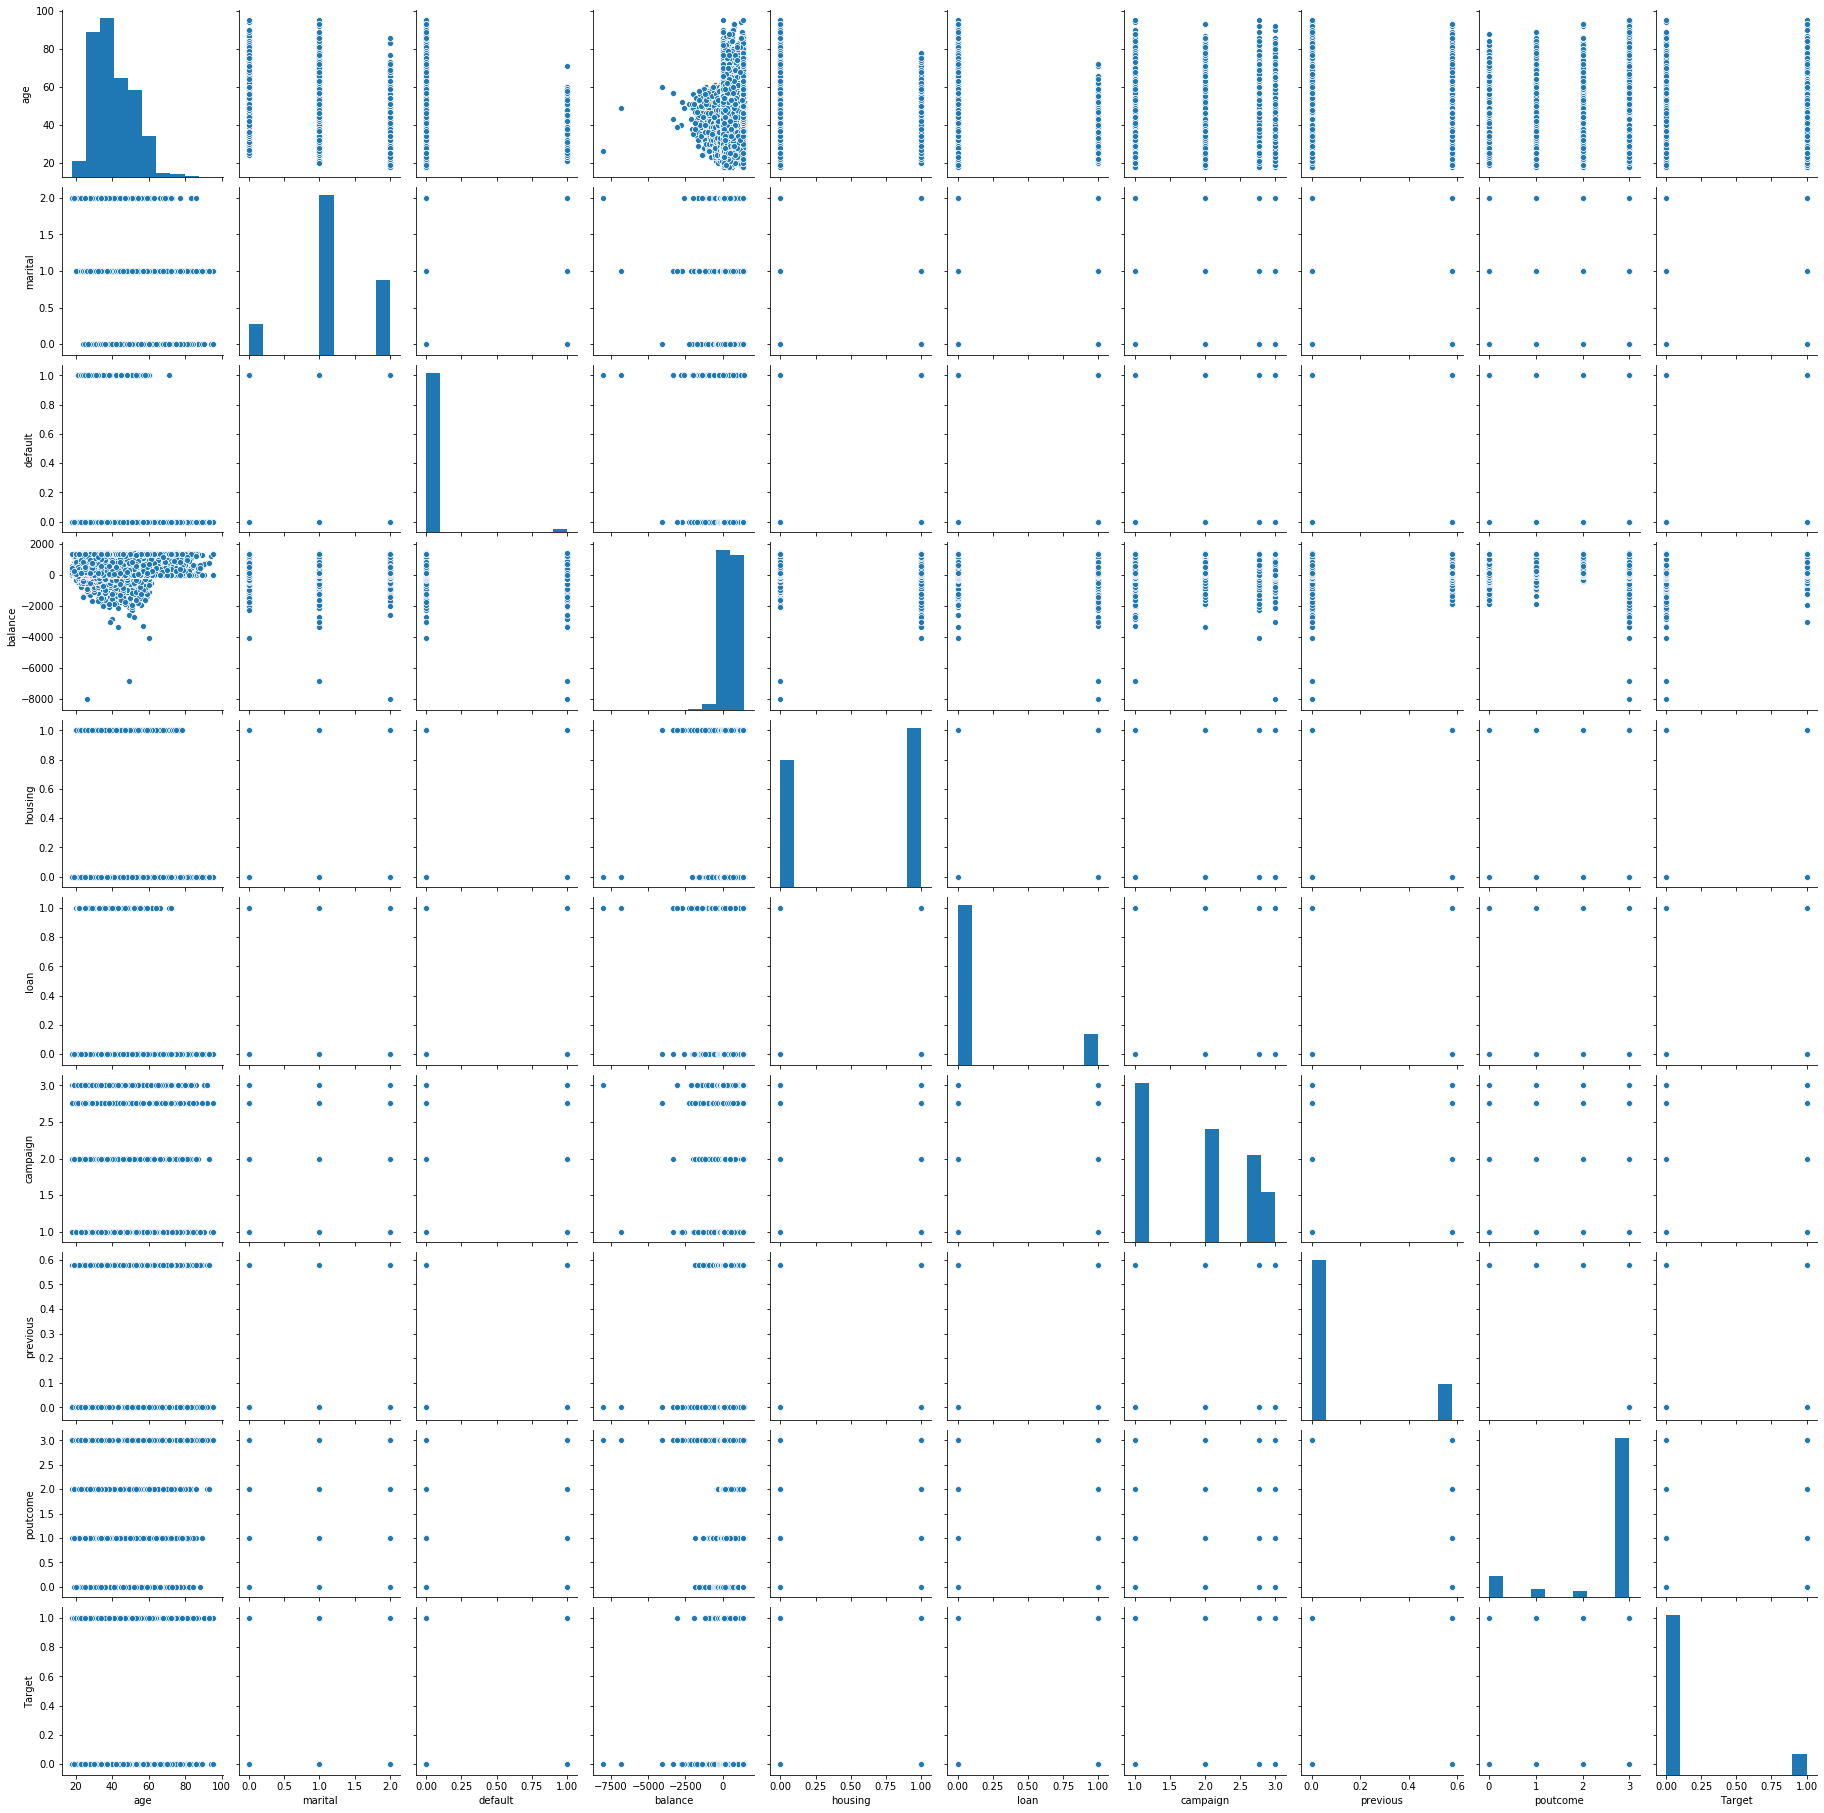

In [39]:
sns.pairplot(df2)

In [40]:
x = df2.drop('Target',axis=1)


In [41]:
y = df2['Target']


In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=2)


In [43]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)


In [44]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,ytrain)
y_pred = logic_r.predict(xtest_scaled)
LR_accuracy = accuracy_score(ytest,y_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,y_pred))
print('\nAccuracy Score',LR_accuracy)
print('\nClassification Report\n\n',classification_report(ytest,y_pred))


Confusion Matrix
 [[11892   107]
 [ 1318   247]]

Accuracy Score 0.8949424948392805

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [45]:
NB = GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predi=NB.predict(xtest_scaled)
NB_accuracy = accuracy_score(ytest,y_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,y_predi))
print('\nAccuracy Score',NB_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_predi))


Confusion Matrix
 [[10667  1332]
 [ 1055   510]]

Accuracy Score 89.49424948392804

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



In [46]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled,ytrain)
knn_predict=knn.predict(xtest_scaled)
knn_accuracy = accuracy_score(ytest,knn_predict)
print('\nConfusion Matrix\n',confusion_matrix(ytest,knn_predict))
print('\nAccuracy Score',knn_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,knn_predict))




Confusion Matrix
 [[11465   534]
 [ 1236   329]]

Accuracy Score 86.95075199056326

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



In [47]:
svc = SVC()
svc.fit(xtrain_scaled,ytrain)
predicted_svc = svc.predict(xtest_scaled)

svc_accuracy = accuracy_score(ytest,predicted_svc)
print('\nConfusion Matrix\n',confusion_matrix(ytest,predicted_svc))
print('\nAccuracy Score',svc_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,predicted_svc))


Confusion Matrix
 [[11856   143]
 [ 1287   278]]

Accuracy Score 89.45738720141551

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [48]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dt_pred=dtree.predict(xtest_scaled)

dtree_accuracy = accuracy_score(ytest,dt_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,dt_pred))
print('\nAccuracy Score',dtree_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,dt_pred))



Confusion Matrix
 [[10820  1179]
 [ 1184   381]]

Accuracy Score 82.57888528457681

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



In [49]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dt_pred=dtree.predict(xtest_scaled)

dtree_accuracy = accuracy_score(ytest,dt_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,dt_pred))
print('\nAccuracy Score',dtree_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,dt_pred))



Confusion Matrix
 [[10820  1179]
 [ 1184   381]]

Accuracy Score 82.57888528457681

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



In [50]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab.fit(xtrain,ytrain)
ada_pred = adab.predict(xtest)


ada_accuracy = accuracy_score(ytest,ada_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,ada_pred))
print('\nAccuracy Score',ada_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,ada_pred))



Confusion Matrix
 [[11886   113]
 [ 1324   241]]

Accuracy Score 89.40578000589797

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [51]:
randf = RandomForestClassifier(n_estimators = 100, random_state=2,max_features=3)
randf.fit(xtrain,ytrain)
rf_pred =randf.predict(xtest)


rf_accuracy = accuracy_score(ytest,rf_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,rf_pred))
print('\nAccuracy Score',rf_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,rf_pred))



Confusion Matrix
 [[11536   463]
 [ 1226   339]]

Accuracy Score 87.5479209672663

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [52]:
grad = GradientBoostingClassifier(n_estimators = 100, random_state=2,max_features=3)
grad.fit(xtrain,ytrain)
grad_pred =grad.predict(xtest)


grad_accuracy = accuracy_score(ytest,grad_pred)
print('\nConfusion Matrix\n',confusion_matrix(ytest,grad_pred))
print('\nAccuracy Score',grad_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,grad_pred))



Confusion Matrix
 [[11897   102]
 [ 1334   231]]

Accuracy Score 89.41315246240048

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.69      0.15      0.24      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.59     13564
weighted avg       0.88      0.89      0.86     13564



In [54]:
scores=[('Naive Bayes',NB_accuracy),
        ('KNN ',knn_accuracy),
        ('Logistic Regression',LR_accuracy),
        ('SVC',svc_accuracy),
        ('Decission Tree',dtree_accuracy),
        ('Random Forest',rf_accuracy),
        ('Ada Boost',ada_accuracy),
        ('Gradient Boosting',grad_accuracy)
       
       ]

scores = pd.DataFrame(scores,columns=['Model','Accuracy Score'])

print('\033[lm'' Current scores with Outliers replaced with mean:]')

scores.sort_values(by='Accuracy Score',ascending=False)


m Current scores with Outliers replaced with mean:]


,Model,Accuracy Score
0,Naive Bayes,0.894942
2,Logistic Regression,0.894942
3,SVC,0.894574
7,Gradient Boosting,0.894132
6,Ada Boost,0.894058
5,Random Forest,0.875479
1,KNN,0.869508
4,Decission Tree,0.825789


# Inference
--> the models perform well in predicting class 0,i.e customeer not subscribing to term deposite

--> The model does not perform well in predicting class 1, because class 1 has less records

-> The dataseet consits of large unknown string values in job, education, and poutcome values and we have deleted all those columns.

-->when benchmarking with duration svc provided 90% accuracy where as naive bais provided 85% accuracy

--> svc couod nperform better becasuse it could create multiple vectors on classifying data

-->After removing duration column the model accuracy dropped by 2%.

--> Decission Tree and Gradient boosting algorithm performed well better for the dataset.

